In [1]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from random import randrange, uniform
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
import os

In [2]:
#Set working directory
os.chdir("E:\Edwisor\Project1_Python")


In [3]:
print(os.getcwd())

E:\Edwisor\Project1_Python


In [4]:
#Load data
df_absent_ds = pd.read_excel("Absenteeism_at_work_Project.xls")
df_absent_ds.head()
df_absent_ds.dtypes
df_absent_ds.shape

(740, 21)

In [5]:
# Separating the variables into continuous and categorical as per given in the problem statment and exploratory data analysis
absent_continuous = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

absent_categorical = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [6]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_absent_ds.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_absent_ds))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("PercentageMissing.csv", index = False)

In [7]:
#create missing value
df_absent_ds['Body mass index'].loc[50]= np.nan

#imputation method
#Actual value = 23
#Mean = 26.689
#Median = 25.0

#Impute with mean
#df_absent_ds['Body mass index']= df_absent_ds['Body mass index'].fillna(df_absent_ds['Body mass index'].mean())

#Impute with median
df_absent_ds['Body mass index']= df_absent_ds['Body mass index'].fillna(df_absent_ds['Body mass index'].median())


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df_absent_ds['Body mass index'].loc[50]

25.0

In [9]:
colnames= df_absent_ds.columns

for i in colnames:
    df_absent_ds[i]= df_absent_ds[i].fillna(df_absent_ds[i].median())
    
df_absent_ds.isnull().sum().sum()

0

In [71]:
#print(colnames)

In [72]:
#outlier analysis

Text(0, 0.5, 'Values')

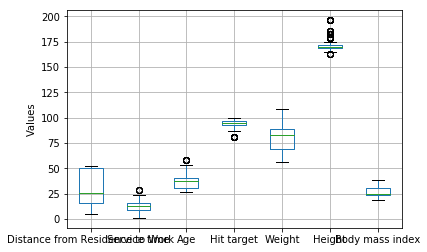

In [10]:
# #Plot boxplot to visualize Outliers
#%matplotlib inline  
df_absent_ds.boxplot(column =['Distance from Residence to Work', 'Service time', 'Age',
       'Hit target', 'Weight', 'Height', 'Body mass index'] )
plt.ylabel('Values')

In [11]:
df_absent_ds.shape

(740, 21)

In [71]:
#df_absent_ds.boxplot(column =['Height'])

In [14]:
# #Detect and delete outliers from data
 df_absent_ds.head()
 

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [15]:
#Detect and replace with NA
# #Extract quartiles
for i in absent_continuous:
     q75, q25 = np.percentile(df_absent_ds[i], [75 ,25])
# #Calculate IQR
     iqr = q75 - q25
# #Calculate inner and outer fence
     minimum = q25 - (iqr*1.5)
     maximum = q75 + (iqr*1.5)
# #Replace with NA
     df_absent_ds.loc[df_absent_ds[i] < minimum,i]= np.nan
     df_absent_ds.loc[df_absent_ds[i] > maximum,i] = np.nan
# #Calculate missing value
     missing_val = pd.DataFrame(df_absent_ds.isnull().sum())
#Impute with median
     df_absent_ds[i]= df_absent_ds[i].fillna(df_absent_ds[i].median())


In [16]:
df_absent_ds.isnull().sum().sum()

0

In [17]:
##Correlation analysis
#Correlation plot
df_corr = df_absent_ds.loc[:,absent_continuous]

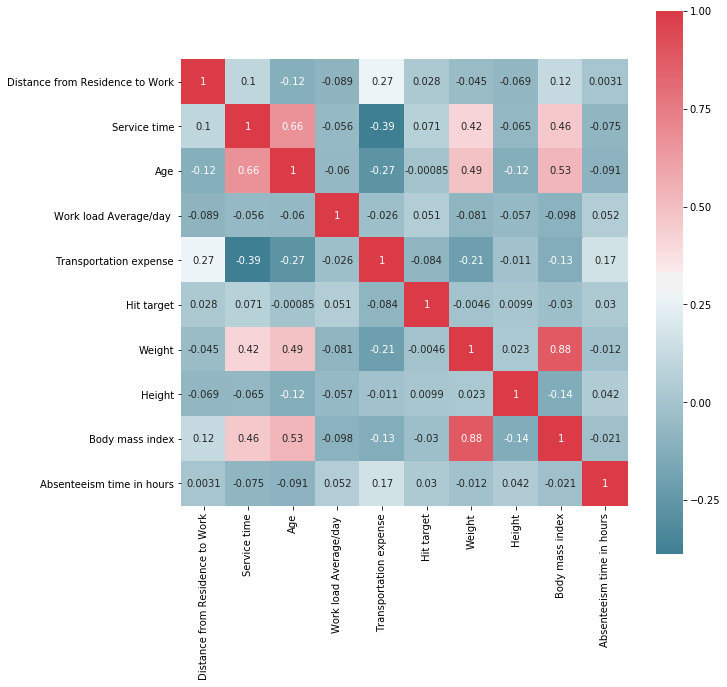

In [18]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [19]:
#FEATURE SELECTION FOR CATEGORICAL VARIABLES
#Taken help from https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
#F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

#F, p = stats.f_oneway(df_absent_ds['Reason for absence'],df_absent_ds['Absenteeism time in hours'] )
#converting token to string
#print("P value is"+str(p))

#looping through categorical variables

for i in absent_categorical:
    F, p = stats.f_oneway(df_absent_ds[i],df_absent_ds['Absenteeism time in hours'] )
    print("P value for "+str(i)+ " is "+str(p))


P value for ID is 7.668042198730782e-177
P value for Reason for absence is 2.4171566391456027e-280
P value for Month of absence is 1.9384323671672517e-32
P value for Day of the week is 0.03729711354406971
P value for Seasons is 7.43274223297258e-36
P value for Disciplinary failure is 1.6372426248884337e-187
P value for Education is 4.1194026059897665e-103
P value for Social drinker is 1.2809993353034328e-150
P value for Social smoker is 6.6118550765910436e-186
P value for Pet is 1.0312343298573575e-125
P value for Son is 8.103768826671717e-114


In [20]:
df_absent_ds.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,170.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [21]:
#Since no value has higher p value we shall not go for dropping any categorical variable
#On basis of high correlation, we are dropping body mass index variable.
df_absent_ds = df_absent_ds.drop(columns=['Body mass index'])
absent_continuous = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Absenteeism time in hours']
df_absent_ds.shape
print(absent_continuous)

['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense', 'Hit target', 'Weight', 'Height', 'Absenteeism time in hours']


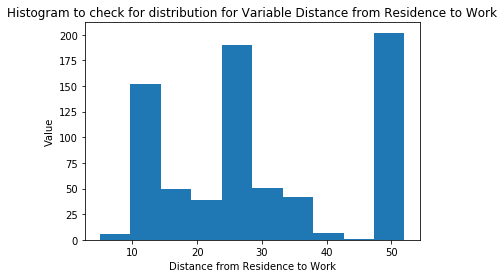

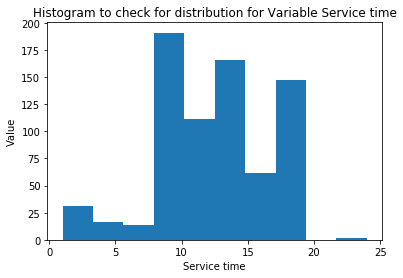

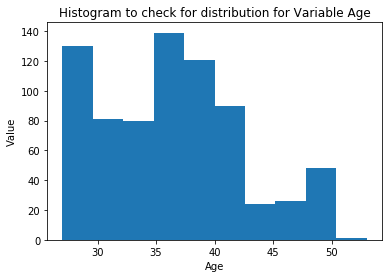

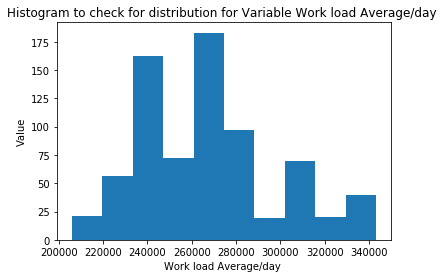

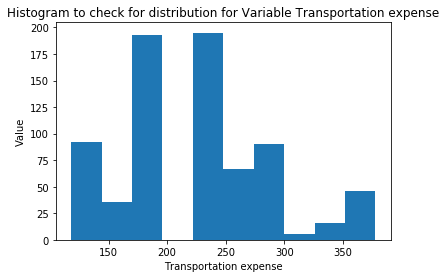

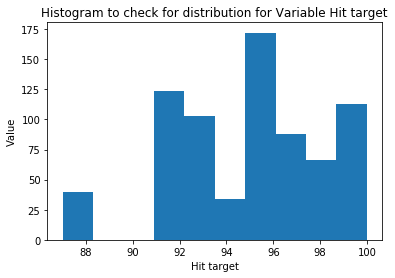

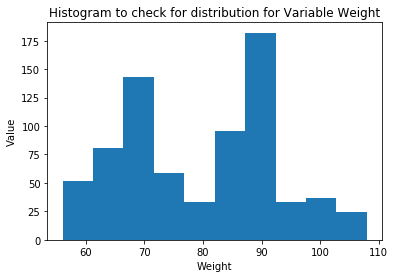

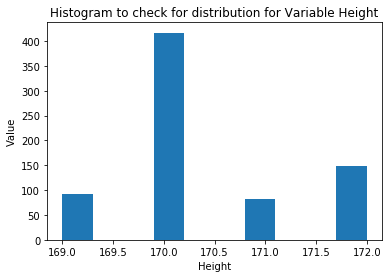

In [89]:
#to check if data is normally distributed or not
for i in absent_continuous:
    if i !='Absenteeism time in hours':
        plt.hist(df_absent_ds[i])
        plt.title("Histogram to check for distribution for Variable " +str(i))
        plt.ylabel("Value")
        plt.xlabel(i)
        plt.show()

In [23]:
colnames= df_absent_ds.columns
#Nomalisation
for i in absent_continuous:
   # print(i)
    df_absent_ds[i] = (df_absent_ds[i] - df_absent_ds[i].min())/(df_absent_ds[i].max() - df_absent_ds[i].min())

In [29]:
#DECISION TREE
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#sklearn.cross_validation package is depreacted now hence using model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [30]:
#Divide data into train and test
train, test = train_test_split(df_absent_ds, test_size=0.2)

In [31]:
#Building DT model
Model_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:19], train.iloc[:,19])

#Apply model on test data
predictions_DT = Model_DT.predict(test.iloc[:,0:19])

In [37]:
# Calculating RMSE and Rsquare for test data to check accuracy for DT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,19],predictions_DT))
rsquare_for_test=r2_score(test.iloc[:,19],predictions_DT)
print("RMSE for DT " + str(rmse_for_test))
print("R-Square for DT "+str(rsquare_for_test))

RMSE for DT 0.17792166643254298
R-Square for DT 0.34506877859808516


In [39]:
#RANDOM FORREST

# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Building Random forest model
Model_RF = RandomForestRegressor(n_estimators = 20).fit(train.iloc[:,0:19], train.iloc[:,19])

#Apply model on test data
predictions_RF = Model_RF.predict(test.iloc[:,0:19])

In [40]:
# Calculating RMSE for test data to check accuracy for RF
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,19],predictions_RF))
rsquare_for_test=r2_score(test.iloc[:,19],predictions_RF)
print("RMSE for RF " + str(rmse_for_test))
print("R-Square for RF "+str(rsquare_for_test))

RMSE for RF 0.20067595159603643
R-Square for RF 0.1668394820882092


In [41]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Building Random forest model
Model_LR = LinearRegression().fit(train.iloc[:,0:19], train.iloc[:,19])

#Apply model on test data
predictions_LR = Model_LR.predict(test.iloc[:,0:19])

In [42]:
# Calculating RMSE for test data to check accuracy for LT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,19],predictions_LR))
rsquare_for_test=r2_score(test.iloc[:,19],predictions_LR)
print("RMSE for LR " + str(rmse_for_test))
print("R-Square for LR "+str(rsquare_for_test))

RMSE for LR 0.1949463539928182
R-Square for LR 0.2137362498076486
